# Trivial spam classifier

This notebook describes solution to implement a simple spam classifier using basic Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers.

## Acknowledgements

The dataset used is from [Email Spam Detection Dataset (classification)](https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification/).

## Prerequisites
* Data is available locally as specified by `data_path`.
* Install required packages.
* Import required libraries.

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

## Data preparation
Load the dataset and shuffle the data. This is done to randomize the order of the rows, which can be useful when preparing data for training to avoid any bias introduced by the original order of the data.

In [7]:
data_path = 'spam_or_not_spam.csv'
data = pd.read_csv(data_path)
data = shuffle(data)
data.head()

,email,label
2836,1's reach home call me.,0
2150,"The table's occupied, I'm waiting by the tree",0
2182,PS U no ur a grown up now right?,0
3015,"&lt;#&gt; is fast approaching. So, Wish u a v...",0
3700,Shall i get my pouch?,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 2836 to 4121
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   5571 non-null   object
 1   label   5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 130.6+ KB


In [9]:
data.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
0      4824   4510                             Sorry, I'll call later   30
1       747    653  Please call our customer service representativ...    4

Iterate over each row in the DataFrame and convert the content of the 'email' column to a string.

In [10]:
data['label'].value_counts()
email_text = []

for index, rows in data.iterrows():
    email_single = str(rows.email)
    email_text.append(email_single)
print(f'Total number of emails: {len(email_text)}')

Total number of emails: 5572


Prepare your text data for a text classification ML model. Tokenize the text data using the Tokenizer class, which is typically used in natural language processing (NLP) tasks.

In [11]:
label = list(data['label'])  # Extract the 'label' column as a list.
tokenizer = Tokenizer(num_words = 1000)  # Create an instance of the Tokenizer class with a vocabulary size of 1000.
tokenizer.fit_on_texts(email_text)  # Fit the tokenizer on the 'email_text' data.
sequences = tokenizer.texts_to_sequences(email_text)  # Convert the 'email_text' data into sequences of integers.

Split the data into training and testing sets. Pad the sequences to ensure they all have the same length. In text data, it's common to pad or truncate sequences to a fixed length before feeding them into a neural network.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(sequences, label, test_size=0.2, random_state=42)

maxlen = 20
x_train = np.array(preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen))
x_test = np.array(preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen))

y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
x_train.shape

(4457, 20)

## Model implementation
Let's initilize a sequential model using Keras, where you can add layers one by one in sequence.
* First, add an Embedding layer to the model. It is often used for handling text data or categorical data where there is a need to convert integer-encoded representations of words or categories into dense vectors of fixed size.

* Then, add a Long Short-Term Memory (LSTM) layer with 32 units to the model. It is a type of recurrent neural network (RNN) layer. It is used for handling sequential data, capturing dependencies over time.

* And lastly, add a dense layer with a single unit and a sigmoid activation function. It is a fully connected layer, where each neuron in the layer is connected to every neuron in the previous layer. In our case `1` indicates that the output is a single scalar value (binary classification).

Then complile the model with the parameters:
* `rmsprop` optimization algorithm used during training (Root Mean Square Propagation adapts the learning rates of each parameter individually)
* `binary_crossentropy` loss function (well-suited for binary classification problems where each example belongs to only one of the two classes)
* `acc` metric used to evaluate the performance of the model during training (accuracy measures the proportion of correctly classified examples out of the total number of examples).

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(2000, 8, input_length=maxlen))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

## Model training

To train out model, we specify the parameters:

* Epochs: how many times the model will iterate over the entire training dataset.
* Batch size: the number of samples in each batch, or sub-division of the training data after processing which the model weights are updated.
* Validation split: the portion of the training data that will be used for validation (e.g., 20% of the training data).

In [15]:
history_lstm = model_lstm.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.8721 - loss: 0.3870 - val_acc: 0.9473 - val_loss: 0.1743
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9638 - loss: 0.1383 - val_acc: 0.9843 - val_loss: 0.0749
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9810 - loss: 0.0657 - val_acc: 0.9753 - val_loss: 0.0876
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9861 - loss: 0.0559 - val_acc: 0.9865 - val_loss: 0.0493
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.9876 - loss: 0.0468 - val_acc: 0.9877 - val_loss: 0.0477
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9879 - loss: 0.0414 - val_acc: 0.9899 - val_loss: 0.0503
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9858 - loss: 0.0492 - val_acc: 0.9899 - val_loss: 0.0431
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9866 - loss: 0.0440 - val_acc: 0.9910 - val_loss: 0.0409
Epoch 9/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - a

## Learning curves

Once the training is done, we can look at the learning curves.

### Training loss
Represents the value of the loss function on the training dataset.

**Interpretation**: A decreasing training loss suggests that the model is improving its ability to fit the training data. If the training loss remains high and doesn't decrease significantly over epochs, it indicates that the model is struggling to fit the training data. This could be a sign of underfitting (also known as **high bias**).

### Validation loss
Represents the value of the loss function on a separate validation dataset not used during training.

**Interpretation**: If the training loss is decreasing but the validation loss is increasing or not decreasing, it could be a sign of overfitting (also known as **high variance**). Overfitting occurs when the model learns to perform well on the training data but fails to generalize to new data.

### Training accuracy
Represents the accuracy of the model on the training dataset. It indicates the proportion of correctly classified samples in the training data.

**Interpretation**: Increasing training accuracy is a positive sign, but high training accuracy alone does not guarantee good generalization. It's possible for a model to memorize the training data without truly learning the underlying patterns.

### Validation accuracy
Represents the accuracy of the model on the validation dataset. It helps assess how well the model generalizes to new data not seen during training.

**Interpretation**: Similar to validation loss, if the training accuracy is high but the validation accuracy is significantly lower or not improving, it may indicate overfitting.


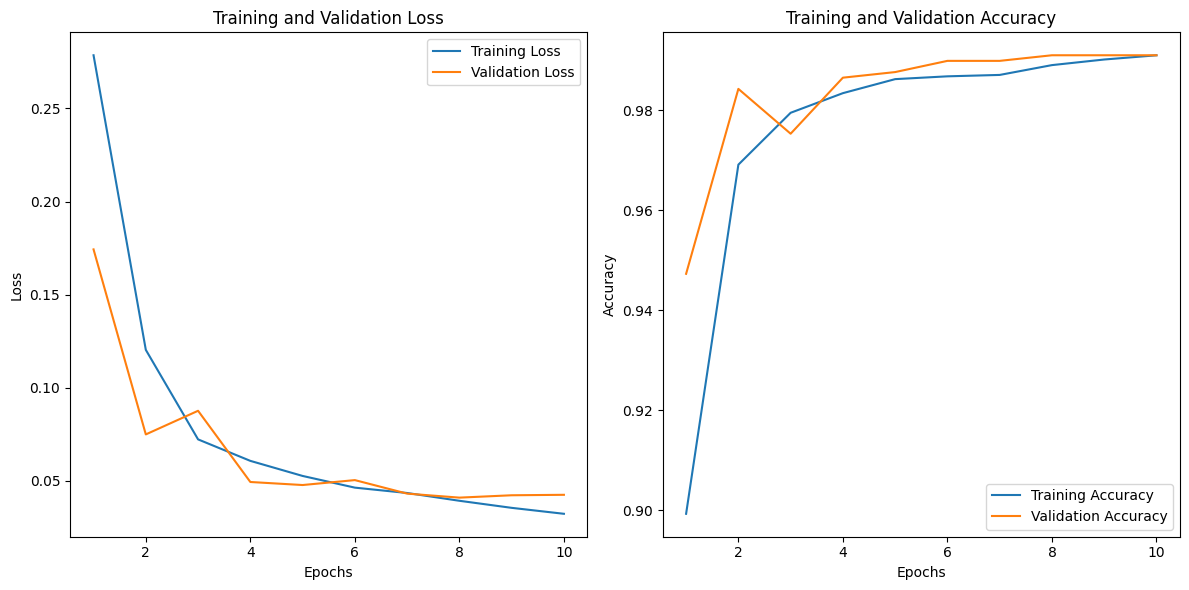

In [16]:
# Get training and validation loss values from the history object.
train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

# Get training and validation accuracy values from the history object.
train_acc = history_lstm.history.get('acc', [])
val_acc = history_lstm.history.get('val_acc', [])

plt.figure(figsize=(12, 6))

# Plot training loss.
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy.
if train_acc and val_acc:
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


## Summary

* **Initial Learning**: In the first few epochs, both the training and validation loss decrease, and both accuracies increase, indicating that the model is learning effectively from the training data.
* **Overfitting Signs**: After some epochs, the validation loss begins to increase, and the validation accuracy plateaus or slightly decreases. This divergence between training and validation performance suggests that the model might be overfitting the training data.

## Fixing high bias / high variance

At this point I want to insert a nice summary from the [Andrew Ng Machine Learning course](https://www.coursera.org/specializations/machine-learning-introduction?utm_medium=sem&utm_source=gg&utm_campaign=B2C_EMEA_machine-learning-introduction_stanford_FTCOF_specializations_country-multiple-set1&campaignid=20858198833&adgroupid=156245838629&device=c&keyword=andrew%20ng%20machine%20learning&matchtype=p&network=g&devicemodel=&adposition=&creativeid=684249172051&hide_mobile_promo&gad_source=1&gclid=Cj0KCQiAnrOtBhDIARIsAFsSe51HA3UifJdlZAt_9vYGzmb3xWMwz6qwdXEGs4cJiGil-AsCWGQG52kaAmkcEALw_wcB) on the practical approaches to fixing high bias / high variances and model effects.

* Getting more training examples: Fixes high variance
* Trying smaller sets of features: Fixes high variance
* Adding features: Fixes high bias
* Adding polynomial features: Fixes high bias
* Decreasing λ: Fixes high bias
* Increasing λ: Fixes high variance

### Diagnosing neural networks

* A neural network with fewer parameters is prone to underfitting. It is also computationally cheaper.
* A large neural network with more parameters is prone to overfitting. It is also computationally expensive. In this case you can use regularization (increase λ) to address the overfitting.

Using a single hidden layer is a good starting default. You can train your neural network on a number of hidden layers using your cross validation set. You can then select the one that performs best.

### Model complexity effects

* Lower-order polynomials (low model complexity) have high bias and low variance. In this case, the model fits poorly consistently.

* Higher-order polynomials (high model complexity) fit the training data extremely well and the test data extremely poorly. These have low bias on the training data, but very high variance.

* In reality, we would want to choose a model somewhere in between, that can generalize well but also fits the data reasonably well.


## Model evaluation

Now let's assess the performance of the trained model on a test dataset.

In [17]:
result=model_lstm.evaluate(x_test,y_test)
print("test loss:{}\ntest accuracy:{}".format(result[0],result[1]))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9934 - loss: 0.0216
test loss:0.029074277728796005
test accuracy:0.9919282793998718


**Test loss**: represents the difference between the model's predictions and the actual labels on the test data. In this case it is relatively low.

**Test accuracy**: measures the proportion of correctly classified examples in the test dataset.